In [1]:
import os
import re

os.environ['USE_PYGEOS'] = '0'
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from variables import *
import geopandas as gpd
import folium 
from pathlib import Path
home = str(Path.home())

    
wrkdir = os.path.join(home,'Documents','Projects','stiff-plots','stiff-plots-BSCWS-gw-sw-interactions','data')



In [2]:
# Load in chemistry data 
chem_path = glob(os.path.join(
    wrkdir, "Water_Quality_Reports", "2023","*23*"))

# All sites chemistry data into a single dataframe
temp_list = []
for i in chem_path:
    temp_df =pd.read_csv(i,
               parse_dates=['StateWellNumber3'])
    temp_list.append(temp_df)
    all_chem_data = pd.concat(temp_list)
all_chem_data
 
# All sites chemistry data in separate dataframes stored in a list
chem_df_list = []
for i in chem_path:
    data_frame_name = os.path.basename(os.path.normpath(i))
    temp_df =pd.read_csv(i,
               parse_dates=['StateWellNumber3'])
    chem_df_list.append(temp_df)



In [3]:
# Rename some columns 
columns= {'StateWellNumber':'well_id',
          'StateWellNumber3':'date',
          'StateWellNumber11':'lat',
          'StateWellNumber9':'lon',
          'StateWellNumber14':'sitename',
          'StoretLongDescription':'chemistry',
          'StoretValue':'value',
          'ParameterUnitOfMeasure':'units',
          'ParameterValuePlusMinus':'error'}
all_chem_data = all_chem_data.rename(columns=columns)
all_chem_data = all_chem_data[[col for col in all_chem_data.columns if col not in ['StateWellNumber6', 'StateWellNumber7','StateWellNumber31',
                                                                                   'StateWellNumber16',
       'StateWellNumber20', 'StateWellNumber30', 'StateWellNumber18',
       'StateWellNumber22', 'StateWellNumber26', 'StateWellNumber24',
       'StateWellNumber28',]]]
all_chem_data.columns

Index(['well_id', 'date', 'lat', 'lon', 'sitename', 'ParameterCode',
       'chemistry', 'ParameterFlag', 'value', 'units', 'error'],
      dtype='object')

In [4]:
# Take a look at chemistry
all_chem_data.chemistry.unique()

array(['ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB',
       'ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB',
       'ALKALINITY, HYDROXIDE DISSOLVED (MG/L), LAB',
       'ALKALINITY, PHENOLPHTHALEIN (MG/L)',
       'ALKALINITY, TOTAL (MG/L AS CACO3)',
       'ALUMINUM, DISSOLVED (UG/L AS AL)',
       'ANION/CATION CHG BAL, PERCENT',
       'ANTIMONY, DISSOLVED (UG/L AS SB)',
       'ARSENIC, DISSOLVED (UG/L AS AS)',
       'BARIUM, DISSOLVED (UG/L AS BA)',
       'BERYLLIUM, DISSOLVED (UG/L AS BE)',
       'BICARBONATE ION, CALCULATED (MG/L AS HCO3)',
       'BORON, DISSOLVED (UG/L AS B)', 'BROMIDE, DISSOLVED, (MG/L AS BR)',
       'CADMIUM, DISSOLVED (UG/L AS CD)',
       'CALCIUM, DISSOLVED (MG/L AS CA)',
       'CARBON-14 DISS APPARENT AGE (YEARS BP)',
       'CARBON-14 FRACTION MODERN',
       'CARBONATE ION, CALCULATED (MG/L AS CO3)',
       'CHLORIDE, DISSOLVED (MG/L AS CL)',
       'CHROMIUM, DISSOLVED (UG/L AS CR)',
       'COBALT, DISSOLVED (UG/L AS CO)', 'COPPER, DISSOLVED (

In [5]:
# Global variables for copying notebooks for each site
Site = "Nueces"
folder_name = Site+'_'+'Stiff_Plots'
all_chem_data

,well_id,date,lat,lon,sitename,ParameterCode,chemistry,ParameterFlag,value,units,error
0,69-01-203,2023-03-29,"29° 58' 59.18"" N","099° 57' 23.41"" W",East Prong Nueces River,425,"ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB",NaN,185.000,mg/L,NaN
1,69-01-203,2023-03-29,"29° 58' 59.18"" N","099° 57' 23.41"" W",East Prong Nueces River,430,"ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB",NaN,4.320,mg/L,NaN
2,69-01-203,2023-03-29,"29° 58' 59.18"" N","099° 57' 23.41"" W",East Prong Nueces River,420,"ALKALINITY, HYDROXIDE DISSOLVED (MG/L), LAB",NaN,0.000,mg/L,NaN
3,69-01-203,2023-03-29,"29° 58' 59.18"" N","099° 57' 23.41"" W",East Prong Nueces River,415,"ALKALINITY, PHENOLPHTHALEIN (MG/L)",NaN,2.160,mg/L,NaN
4,69-01-203,2023-03-29,"29° 58' 59.18"" N","099° 57' 23.41"" W",East Prong Nueces River,410,"ALKALINITY, TOTAL (MG/L AS CACO3)",NaN,189.000,mg/L,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56,69-01-105,2023-05-10,"29° 58' 30.45"" N","099° 58' 29.77"" W",Camp Eagle,70301,"TOTAL DISSOLVED SOLIDS , SUM OF CONSTITUENTS (...",NaN,208.908,mg/L,NaN
57,69-01-105,2023-05-10,"29° 58' 30.45"" N","099° 58' 29.77"" W",Camp Eagle,7012,TRITIUM IN WATER (TRITIUM UNITS),NaN,0.400,TU,0.09
58,69-01-105,2023-05-10,"29° 58' 30.45"" N","099° 58' 29.77"" W",Camp Eagle,22703,"URANIUM, NATURAL, DISSOLVED (UG/L AS U)",<,1.000,ug/L,NaN
59,69-01-105,2023-05-10,"29° 58' 30.45"" N","099° 58' 29.77"" W",Camp Eagle,1085,"VANADIUM, DISSOLVED (UG/L AS V)",NaN,5.400,ug/L,NaN


In [6]:
# Convert lat lon in to decimal degrees
def dms_to_dd(dms):
    """Return decimal degrees if passed degrees minutes seconds
    
    >>> dms_to_dd(099° 57' 23.41" W)
    -99.95650278
    """
    
    dms = re.sub(r'\s','', dms)
    sign = -1 if re.search('[swSW]', dms) else 1
    numbers = [*filter(len, re.split('\D+', dms, maxsplit=4))]
    degree = numbers[0]
    minutes = numbers[1]
    seconds_decimal = numbers[2]
    decimal_val = numbers[3] if len(numbers)>3 else '0'
    seconds_decimal += '.' + decimal_val
    dd = sign*round((int(degree) + int(minutes)/60 + float(seconds_decimal)/3600),8)
    return dd

In [7]:
all_chem_data.columns

Index(['well_id', 'date', 'lat', 'lon', 'sitename', 'ParameterCode',
       'chemistry', 'ParameterFlag', 'value', 'units', 'error'],
      dtype='object')

In [8]:
all_chem_data.loc[:,'lat_dd'] = all_chem_data.loc[:,'lat'].apply(lambda x: dms_to_dd(x))
all_chem_data.loc[:,'lon_dd'] = all_chem_data.loc[:,'lon'].apply(lambda x: dms_to_dd(x))

In [9]:
# Reformat the data
# Unstack dataset so that the chemistry are in columns 

df = all_chem_data.set_index(['date','well_id','sitename','lat_dd','lon_dd','units','chemistry',])['value'].unstack().reset_index()
df


chemistry,date,well_id,sitename,lat_dd,lon_dd,units,"ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB","ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB","ALKALINITY, HYDROXIDE DISSOLVED (MG/L), LAB","ALKALINITY, PHENOLPHTHALEIN (MG/L)",...,"STRONTIUM, DISSOLVED (UG/L AS SR)","STRONTIUM, ISOTOPE OF MASS 86 AND 87 RATIO","SULFATE, DISSOLVED (MG/L AS SO4)","TEMPERATURE, WATER (CELSIUS)","THALLIUM, DISSOLVED (UG/L AS TL)","TOTAL DISSOLVED SOLIDS , SUM OF CONSTITUENTS (MG/L)",TRITIUM IN WATER (TRITIUM UNITS),"URANIUM, NATURAL, DISSOLVED (UG/L AS U)","VANADIUM, DISSOLVED (UG/L AS V)","ZINC, DISSOLVED (UG/L AS ZN)"
0,2023-03-29,69-01-203,East Prong Nueces River,29.983106,-99.956503,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-29,69-01-203,East Prong Nueces River,29.983106,-99.956503,C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-29,69-01-203,East Prong Nueces River,29.983106,-99.956503,SU,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-29,69-01-203,East Prong Nueces River,29.983106,-99.956503,0/00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-29,69-01-203,East Prong Nueces River,29.983106,-99.956503,MICR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023-05-10,69-01-105,Camp Eagle,29.975125,-99.974936,PCT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2023-05-10,69-01-105,Camp Eagle,29.975125,-99.974936,TU,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
70,2023-05-10,69-01-105,Camp Eagle,29.975125,-99.974936,Y-BP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2023-05-10,69-01-105,Camp Eagle,29.975125,-99.974936,mg/L,190.0,0.0,0.0,0.0,...,NaN,NaN,3.17,NaN,NaN,208.908,NaN,NaN,NaN,NaN


In [10]:
df_list =[]
col_list = list(all_chem_data.chemistry.unique())
for i in col_list:
    x = df.loc[df[i].notnull(),['well_id','date','sitename','lat_dd','lon_dd',i]]
    df_list.append(x)
merged = df_list[0]
for i in df_list[1:]:
    df_clean = merged.merge(i,left_on='well_id',right_on='well_id',how='left',suffixes=(None,'_right'))
    merged =df_clean
df_clean

chemistry,well_id,date,sitename,lat_dd,lon_dd,"ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB",date_right,sitename_right,lat_dd_right,lon_dd_right,...,date_right,sitename_right,lat_dd_right,lon_dd_right,"RADIUM 226, DISSOLVED, PC/L",date_right,sitename_right,lat_dd_right,lon_dd_right,"RADIUM 228, DISSOLVED (PC/L AS RA-228)"
0,69-01-203,2023-03-29,East Prong Nueces River,29.983106,-99.956503,185.0,2023-03-29,East Prong Nueces River,29.983106,-99.956503,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,69-01-204,2023-03-29,Camp Eagle,29.979525,-99.957522,206.0,2023-03-29,Camp Eagle,29.979525,-99.957522,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,69-01-403,2023-03-29,East Prong Nueces River,29.954364,-99.961389,157.0,2023-03-29,East Prong Nueces River,29.954364,-99.961389,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,69-01-404,2023-03-29,East Prong Nueces River,29.941633,-99.980031,157.0,2023-03-29,East Prong Nueces River,29.941633,-99.980031,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,69-01-502,2023-03-29,Eagle Nest Ranch Morris Springs,29.950556,-99.954722,202.0,2023-03-29,Eagle Nest Ranch Morris Springs,29.950556,-99.954722,...,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5,69-01-105,2023-05-10,Camp Eagle,29.975125,-99.974936,190.0,2023-05-10,Camp Eagle,29.975125,-99.974936,...,2023-05-10,Camp Eagle,29.975125,-99.974936,1.0,2023-05-10,Camp Eagle,29.975125,-99.974936,1.0


In [11]:
df_clean = df_clean[[col for col in df_clean.columns if col not in ['date_right',
'sitename_right',
'lat_dd_right',
'lon_dd_right']]]
df_clean = df_clean.drop_duplicates(subset=['well_id','date','sitename'],)
df_clean

chemistry,well_id,date,sitename,lat_dd,lon_dd,"ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB","ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB","ALKALINITY, HYDROXIDE DISSOLVED (MG/L), LAB","ALKALINITY, PHENOLPHTHALEIN (MG/L)","ALKALINITY, TOTAL (MG/L AS CACO3)",...,"TEMPERATURE, WATER (CELSIUS)","THALLIUM, DISSOLVED (UG/L AS TL)","TOTAL DISSOLVED SOLIDS , SUM OF CONSTITUENTS (MG/L)",TRITIUM IN WATER (TRITIUM UNITS),"URANIUM, NATURAL, DISSOLVED (UG/L AS U)","VANADIUM, DISSOLVED (UG/L AS V)","ZINC, DISSOLVED (UG/L AS ZN)","ALPHA, DISSOLVED (PC/L)","RADIUM 226, DISSOLVED, PC/L","RADIUM 228, DISSOLVED (PC/L AS RA-228)"
0,69-01-203,2023-03-29,East Prong Nueces River,29.983106,-99.956503,185.0,4.32,0.0,2.16,189.0,...,20.5,1.0,220.309,0.74,1.0,4.59,5.00,NaN,NaN,NaN
1,69-01-204,2023-03-29,Camp Eagle,29.979525,-99.957522,206.0,0.00,0.0,0.00,206.0,...,21.4,1.0,239.160,0.67,1.0,4.94,5.72,NaN,NaN,NaN
2,69-01-403,2023-03-29,East Prong Nueces River,29.954364,-99.961389,157.0,5.52,0.0,2.76,163.0,...,19.4,1.0,187.767,0.85,1.0,4.05,5.00,NaN,NaN,NaN
3,69-01-404,2023-03-29,East Prong Nueces River,29.941633,-99.980031,157.0,6.16,0.0,3.08,163.0,...,18.6,1.0,188.210,0.85,1.0,4.05,5.00,NaN,NaN,NaN
4,69-01-502,2023-03-29,Eagle Nest Ranch Morris Springs,29.950556,-99.954722,202.0,0.00,0.0,0.00,202.0,...,20.9,1.0,236.113,0.67,1.0,4.63,5.00,NaN,NaN,NaN
5,69-01-105,2023-05-10,Camp Eagle,29.975125,-99.974936,190.0,0.00,0.0,0.00,190.0,...,22.5,1.0,208.908,0.40,1.0,5.40,5.00,3.12,1.0,1.0


In [12]:
# Explore the chemistry data

stats=df_clean[col_list].describe()
outfolder = os.path.join(wrkdir,"outputs")
if not os.path.exists(outfolder): os.mkdir(outfolder)
stats.to_csv(os.path.join(outfolder,"nueces_summary_stats_2023.csv"))

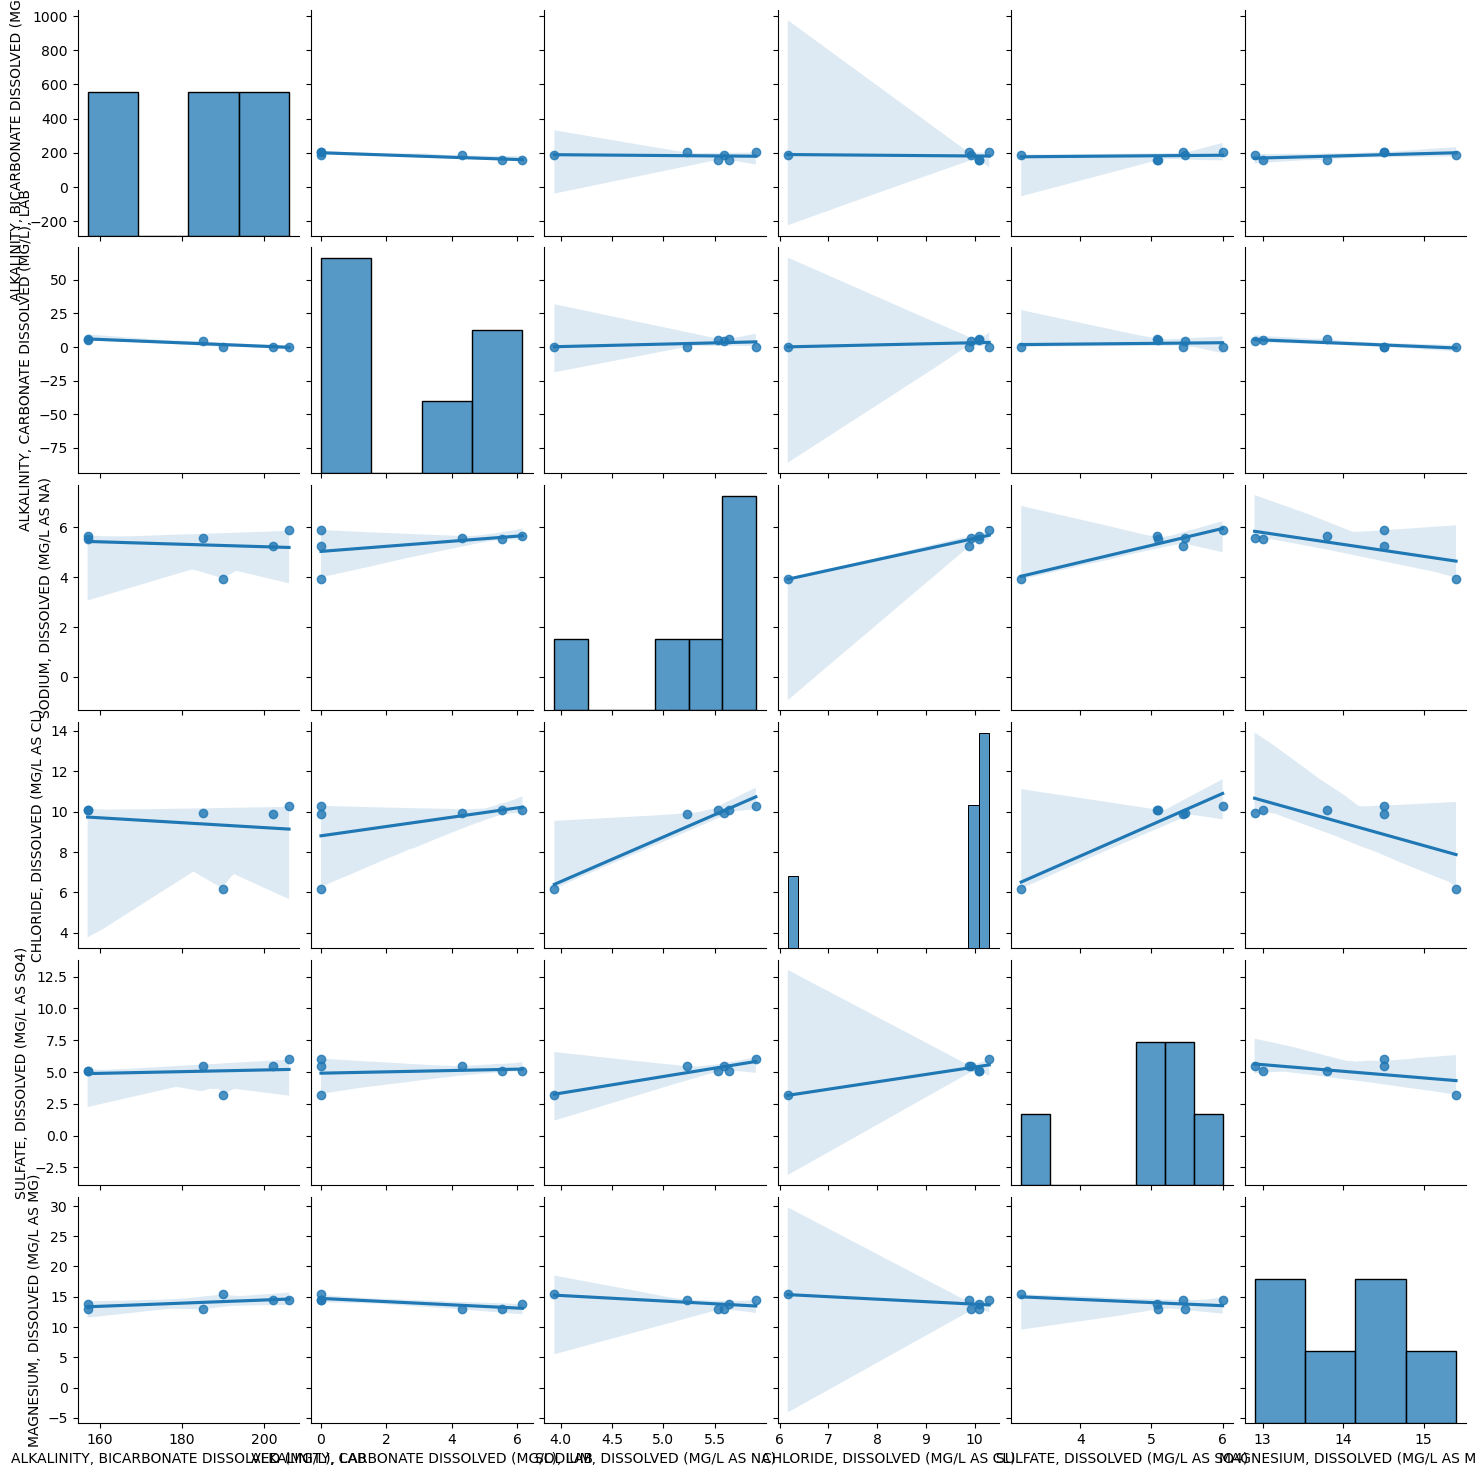

In [13]:
# Get a quick visual overview the data

sns.pairplot(df_clean, vars=['ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB',
                       'ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB', 
                       'SODIUM, DISSOLVED (MG/L AS NA)',
                       'CHLORIDE, DISSOLVED (MG/L AS CL)',
                       'SULFATE, DISSOLVED (MG/L AS SO4)',
                       'MAGNESIUM, DISSOLVED (MG/L AS MG)'],kind='reg')

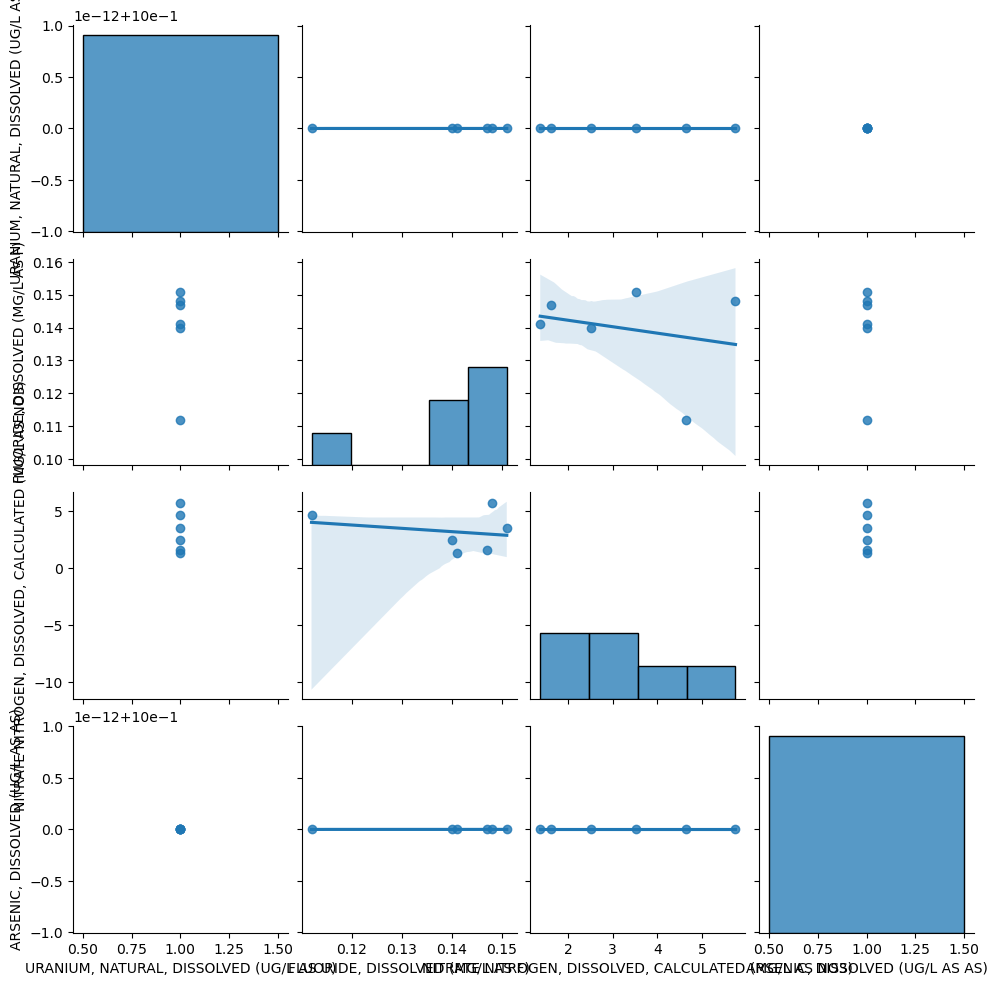

In [14]:
sns.pairplot(df_clean, vars=[ 'URANIUM, NATURAL, DISSOLVED (UG/L AS U)',
                       'FLUORIDE, DISSOLVED (MG/L AS F)',
                       'NITRATE NITROGEN, DISSOLVED, CALCULATED (MG/L AS NO3)',
                       'ARSENIC, DISSOLVED (UG/L AS AS)'],kind='reg')


In [16]:
# plot the data
gdf = gpd.GeoDataFrame(df_clean,geometry = gpd.points_from_xy(x=df_clean.lon_dd,y=df_clean.lat_dd))
# Plot the site GPS points
m = folium.Map(location=[ 29.98310556, -99.95650278],
               tiles='Stamen Terrain',
               zoom_start=13)
for i, k in gdf.groupby('well_id'):
    folium.Marker(location=[pd.to_numeric(k.iloc[0][3]), pd.to_numeric(k.iloc[0][4])],
                  popup=i,
                  icon=folium.Icon()).add_to(m)
m

### data has been formated and site locations checked so now create the Stiff Plots

## Create the Stiff plots

### Calculate units of equivalent weight

In [31]:
# Convert all cols with ug/l to mg/l
ug_l_cols = [c for c in df.columns if 'UG/L' in c]
df.loc[:, ug_l_cols] = df.loc[:, ug_l_cols].apply(lambda x: x/1000)
# convert all cols with pg/l to mg/l
df.loc[:, ug_l_cols]

chemistry,"ALUMINUM, DISSOLVED (UG/L AS AL)","ANTIMONY, DISSOLVED (UG/L AS SB)","ARSENIC, DISSOLVED (UG/L AS AS)","BARIUM, DISSOLVED (UG/L AS BA)","BERYLLIUM, DISSOLVED (UG/L AS BE)","BORON, DISSOLVED (UG/L AS B)","CADMIUM, DISSOLVED (UG/L AS CD)","CHROMIUM, DISSOLVED (UG/L AS CR)","COBALT, DISSOLVED (UG/L AS CO)","COPPER, DISSOLVED (UG/L AS CU)",...,"MANGANESE, DISSOLVED (UG/L AS MN)","MERCURY, DISSOLVED (UG/L AS HG)","MOLYBDENUM, DISSOLVED (UG/L AS MO)","SELENIUM, DISSOLVED (UG/L AS SE)","SILVER, DISSOLVED (UG/L AS AG)","STRONTIUM, DISSOLVED (UG/L AS SR)","THALLIUM, DISSOLVED (UG/L AS TL)","URANIUM, NATURAL, DISSOLVED (UG/L AS U)","VANADIUM, DISSOLVED (UG/L AS V)","ZINC, DISSOLVED (UG/L AS ZN)"
0,0.005,0.001,0.001,0.0755,0.001,0.05,0.001,0.001,0.001,0.00320,...,0.00100,0.0002,0.001,0.005,0.001,0.2150,0.001,0.001,0.00459,0.00500
1,0.005,0.001,0.001,0.0497,0.001,0.05,0.001,0.001,0.001,0.00249,...,0.00100,0.0002,0.001,0.005,0.001,0.1730,0.001,0.001,0.00494,0.00572
2,0.005,0.001,0.001,0.0518,0.001,0.05,0.001,0.001,0.001,0.00100,...,0.00125,0.0002,0.001,0.005,0.001,0.1540,0.001,0.001,0.00405,0.00500
3,0.005,0.001,0.001,0.0488,0.001,0.05,0.001,0.001,0.001,0.00317,...,0.00100,0.0002,0.001,0.005,0.001,0.1620,0.001,0.001,0.00405,0.00500
4,0.005,0.001,0.001,0.0318,0.001,0.05,0.001,0.001,0.001,0.00134,...,0.00100,0.0002,0.001,0.005,0.001,0.1740,0.001,0.001,0.00463,0.00500
5,0.005,0.001,0.001,0.1150,0.001,0.05,0.001,0.001,0.001,0.00155,...,0.00100,0.0002,0.001,0.005,0.001,0.0734,0.001,0.001,0.00540,0.00500


In [36]:
# STiff plot for basic ions 
columns={'ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB':"HCO3",
         'ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB':'CO3', 
         'SODIUM, DISSOLVED (MG/L AS NA)':'Na',
         'CHLORIDE, DISSOLVED (MG/L AS CL)':"Cl",
         'SULFATE, DISSOLVED (MG/L AS SO4)':'SO4',
         'MAGNESIUM, DISSOLVED (MG/L AS MG)':'Mg',
         'CALCIUM, DISSOLVED (MG/L AS CA)':'Ca',
         'ALKALINITY, CARBONATE DISSOLVED (MG/L), LAB':'CO3',
         'POTASSIUM, DISSOLVED (MG/L AS K)':'K',
         'SILICA, DISSOLVED (MG/L AS SI02)' :'SiO2',
         'IRON, DISSOLVED (UG/L AS FE)':'Fe',
         'FLUORIDE, DISSOLVED (MG/L AS F)' : 'F',
         'LITHIUM, DISSOLVED (UG/L AS LI)': 'Li',
         'COPPER, DISSOLVED (UG/L AS CU)': 'Cu',
         'ALUMINUM, DISSOLVED (UG/L AS AL)':'Al',
         'ANTIMONY, DISSOLVED (UG/L AS SB)': 'Sb',
         'ARSENIC, DISSOLVED (UG/L AS AS)': "As",
         'BARIUM, DISSOLVED (UG/L AS BA)':'Ba',
         'BERYLLIUM, DISSOLVED (UG/L AS BE)': 'Be' ,
         'BORON, DISSOLVED (UG/L AS B)':'B',
         'CADMIUM, DISSOLVED (UG/L AS CD)':'Cd',
         'CHROMIUM, DISSOLVED (UG/L AS CR)':'Cr',
         'COBALT, DISSOLVED (UG/L AS CO)':'Co',
         'LEAD, DISSOLVED (UG/L AS PB)':'Pb',
         'MANGANESE, DISSOLVED (UG/L AS MN)':'Mn',
         'MERCURY, DISSOLVED (UG/L AS HG)':'Hg',
         'MOLYBDENUM, DISSOLVED (UG/L AS MO)':'Mo',
         'SELENIUM, DISSOLVED (UG/L AS SE)':'Se',
         'SILVER, DISSOLVED (UG/L AS AG)':'Ag',
         'STRONTIUM, DISSOLVED (UG/L AS SR)':'Sr',
         'THALLIUM, DISSOLVED (UG/L AS TL)': 'Tl',
         'URANIUM, NATURAL, DISSOLVED (UG/L AS U)': 'U',
         'VANADIUM, DISSOLVED (UG/L AS V)':'V',
         'ZINC, DISSOLVED (UG/L AS ZN)': 'Zn',
         'PHOSPHORUS, DISSOLVED (MG/L AS P)':'P',
         'BROMIDE, DISSOLVED, (MG/L AS BR)':'Br'}

df = df_clean.rename(columns=columns)
# atomic weights with Charges of 2 are divided by 2 already for ease of calculation

ions = {
    'HCO3': 61.02, 'CO3': 30.004, 'Cl': 35.45, 'SO4': 48.03,
    'Na': 22.9898, 'Ca': 20.04, 'Mg': 12.153, 'K': 39.0983, }


# equivalent weight column
for ion in ions.keys():
    df.loc[:,[str(ion)+'_meq'] ]= df.loc[:,ion]/ions[ion]
    

In [50]:
x = pd.DataFrame(data=columns, index = columns.keys())
x = x.transpose()
x['ALKALINITY, BICARBONATE DISSOLVED (MG/L), LAB'].to_csv('ions.csv')

In [37]:
df.columns, 

(Index(['well_id', 'date', 'sitename', 'lat_dd', 'lon_dd', 'HCO3', 'CO3',
        'ALKALINITY, HYDROXIDE DISSOLVED (MG/L), LAB',
        'ALKALINITY, PHENOLPHTHALEIN (MG/L)',
        'ALKALINITY, TOTAL (MG/L AS CACO3)', 'Al',
        'ANION/CATION CHG BAL, PERCENT', 'Sb', 'As', 'Ba', 'Be',
        'BICARBONATE ION, CALCULATED (MG/L AS HCO3)', 'B',
        'BROMIDE, DISSOLVED, (MG/L AS BR)', 'Cd', 'Ca',
        'CARBON-14 DISS APPARENT AGE (YEARS BP)', 'CARBON-14 FRACTION MODERN',
        'CARBONATE ION, CALCULATED (MG/L AS CO3)', 'Cl', 'Cr', 'Co', 'Cu',
        'DELTA CARBON 13 C13/C12 PER MIL',
        'DEUTERIUM, EXPRESSED AS PERMIL VSMOW', 'F',
        'HARDNESS, TOTAL, CALCULATED (MG/L AS CACO3)', 'Fe', 'Pb', 'Li', 'Mg',
        'Mn', 'Hg', 'Mo',
        'NITRATE NITROGEN, DISSOLVED, CALCULATED (MG/L AS NO3)',
        'NITRITE PLUS NITRATE, DISSOLVED (MG/L AS N)',
        'OXYGEN-18, EXPRESSED AS PERMIL VSMOW', 'PH (STANDARD UNITS), FIELD',
        'PHOSPHORUS, DISSOLVED (MG/L AS P

## Generate the Image files for QGIS

In [15]:
def diagramStiff(a, maxConNorm, index,well_name):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    from matplotlib.patches import Polygon
    from matplotlib.collections import PatchCollection

    fig, ax = plt.subplots()
    patches = []

    polygon = Polygon(a, closed=True, color='orange')
    patches.append(polygon)

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

    colors = 100*np.random.rand(len(patches))
    p.set_array(np.array(colors))

    ax.add_collection(p)

    # Change the axes
    x = [0, .125, .25, .375, .5, .625, .75, .875, 1]
    labels = [maxConNorm/2, .75*maxConNorm/2, .5*maxConNorm/2, .25*maxConNorm/2,
             0, .25*maxConNorm/2, .5*maxConNorm/2, .75*maxConNorm/2, maxConNorm/2]
    formattedLabels = ["%.1f" % label for label in labels]
    plt.yticks([0,0.5,1],[0,0.5,1], fontsize=0 )
    plt.xticks(x, formattedLabels, fontsize=12)
    plt.grid(visible=True, which='minor', linestyle='-')
    

    ax.set_title(index+'-'+well_name)
    
    ax.set_xlabel('meq/l', fontsize=12)


    #Generate labels for cations    
    ax.text(-0.02, 1, 'Na + K', fontsize=12, horizontalalignment='right')
    ax.text(-0.02, 0.5, 'Mg', fontsize=12, horizontalalignment='right')
    ax.text(-0.02, 0, 'Ca', fontsize=12, horizontalalignment='right')

    # Generate labels for anions
    ax.text(1.02, 1, 'Cl', fontsize=12)
    ax.text(1.02, 0.5, 'SO4', fontsize=12)
    ax.text(1.02, 0, 'HCO3+CO3', fontsize=12)
    
#     plt.axis('off')
    plt.tight_layout()
    plt.close()
    
    return fig

In [17]:
out_svg_path = os.path.join(wrkdir,Site, folder_name,"Stiff_SVG")
if not os.path.exists(out_svg_path): os.makedirs(out_svg_path)

out_png_path = os.path.join(wrkdir, Site, folder_name,"Stiff_PNG")
if not os.path.exists(out_png_path): os.makedirs(out_png_path)

# Get Maximum value of all data to make axes all the same size  

max_con_list=[]
for index, row in df.iterrows():
    Na_K, Ca, Mg = row['Na_meq']+row['K_meq'], row['Ca_meq'], row['Mg_meq'] 
    Cl, SO4, HCO3_CO3 = row['Cl_meq'], row['SO4_meq'], row['HCO3_meq']+row['CO3_meq']
    maxConNorm = max([Na_K, Ca, Mg, Cl, SO4, HCO3_CO3])*2
    max_con_list.append(maxConNorm)
maxConNorm=max(max_con_list)

    
df = df.set_index('well_id')
for index, row in df.iterrows():
    Na_K, Ca, Mg = row['Na_meq']+row['K_meq'], row['Ca_meq'], row['Mg_meq'] 
    Cl, SO4, HCO3_CO3 = row['Cl_meq'], row['SO4_meq'], row['HCO3_meq']+row['CO3_meq']

    # set of points of the Stiff diagram
    a = np.array([[.5 + Cl/maxConNorm,1],[.5 + SO4/maxConNorm,.5],[.5 + HCO3_CO3/maxConNorm,0],
                  [.5 - Ca/maxConNorm,0],[.5 - Mg/maxConNorm,0.5],[.5 - Na_K/maxConNorm,1]])

    well_name=index+ ' '+ row[1]
    figure = diagramStiff(a, maxConNorm, index,well_name)
    figure.savefig(os.path.join(out_svg_path,"Stiff-"+str(index)+'.svg'),transparent=False)
    figure.savefig(os.path.join(out_png_path,str(well_name)+'_2023'+'.png'),dpi=300,transparent=False)
   


## Look at Stiff diagrams

In [18]:
df.SO4_meq,df.Ca_meq,df.Mg_meq,df.Mg

(well_id
 69-01-203    0.113887
 69-01-204    0.124922
 69-01-403    0.105975
 69-01-404    0.105767
 69-01-502    0.113471
 69-01-105    0.066000
 Name: SO4_meq, dtype: float64,
 well_id
 69-01-203    2.909182
 69-01-204    3.063872
 69-01-403    2.295409
 69-01-404    2.270459
 69-01-502    3.123752
 69-01-105    2.624750
 Name: Ca_meq, dtype: float64,
 well_id
 69-01-203    1.061466
 69-01-204    1.193121
 69-01-403    1.069695
 69-01-404    1.135522
 69-01-502    1.193121
 69-01-105    1.267177
 Name: Mg_meq, dtype: float64,
 well_id
 69-01-203    12.9
 69-01-204    14.5
 69-01-403    13.0
 69-01-404    13.8
 69-01-502    14.5
 69-01-105    15.4
 Name: Mg, dtype: float64)

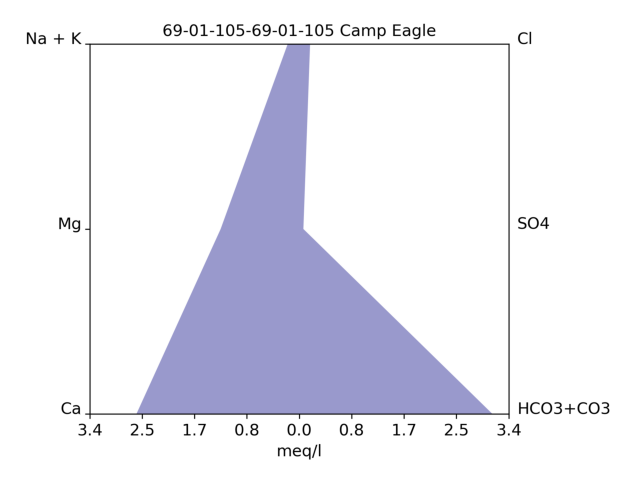

In [19]:
stiff_object_path = os.path.join(wrkdir,Site, folder_name,"Stiff_PNG","69-01-105 Camp Eagle_2023.png")
import matplotlib.pyplot as plt
stiffObject = plt.imread(stiff_object_path)
fig, ax = plt.subplots(figsize=(10,6))
ax.axis('off')
ax.imshow(stiffObject)
plt.show()

## Create the sld file for QGIS

In [44]:
#path to the Svg folder
imagePath = os.path.join(wrkdir,Site, folder_name,"Stiff_SVG")
imagePath = imagePath.replace('\\','/')
imagePath

'C:/Users/nlamkey/Documents/Projects/stiff-plots/stiff-plots-BSCWS-gw-sw-interactions/data/Nueces/Nueces_Stiff_Plots/Stiff_SVG'

In [45]:
def create_sld(file_name,df,imagePath):
    
    out_sld_file = os.path.join(out_sld, file_name)

    archivoestilos = open(out_sld_file, 'w')
    archivoestilos.write(encabezado)

    for index, row in df.iterrows():
        item = re.sub('%%path%%', imagePath, item)
        estiloitem = re.sub('%%index%%', index, item)
        archivoestilos.write(estiloitem)
    archivoestilos.write(final)

    return archivoestilos.close()
    

In [46]:
# Style file generation
out_sld = os.path.join(wrkdir, Site, folder_name, "txt_files")
if not os.path.exists(out_sld): os.makedirs(out_sld)
    
# Split merged dataframe so same wells different samples align with times sample was taken
df.to_csv(os.path.join(out_sld,"first_event.csv"))

# First Event sld creation

out_sld_file = os.path.join(out_sld,"first_event.sld")

archivoestilos = open(out_sld_file, 'w')
archivoestilos.write(encabezado)

for index, row in df.iterrows():
    item = re.sub('%%path%%', imagePath, item)
    estiloitem = re.sub('%%index%%', index, item)
    archivoestilos.write(estiloitem)
archivoestilos.write(final)

archivoestilos.close()